<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/EDA_V0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S4E12 - Insurance Premium Prediction Dataset**

## Problem Statement

The goal of this dataset is to facilitate the development and testing of regression models for predicting insurance premiums based on various customer characteristics and policy details. Insurance companies often rely on data-driven approaches to estimate premiums, taking into account factors such as age, income, health status, and claim history. This synthetic dataset simulates real-world scenarios to help practitioners practice feature engineering, data cleaning, and model training.

## Dataset Overview

This dataset contains 2Lk+ and 20 features with a mix of categorical, numerical, and text data. It includes missing values, incorrect data types, and skewed distributions to mimic the complexities faced in real-world datasets. The target variable for prediction is the "Premium Amount".

### Features

1. Age: Age of the insured individual (Numerical)
2. Gender: Gender of the insured individual (Categorical: Male, Female)
3. Annual Income: Annual income of the insured individual (Numerical, skewed)
4. Marital Status: Marital status of the insured individual (Categorical: Single, Married, Divorced)
5. Number of Dependents: Number of dependents (Numerical, with missing values)
6. Education Level: Highest education level attained (Categorical: High School, Bachelor's, Master's, PhD)
7. Occupation: Occupation of the insured individual (Categorical: Employed, Self-Employed, Unemployed)
8. Health Score: A score representing the health status (Numerical, skewed)
9. Location: Type of location (Categorical: Urban, Suburban, Rural)
10. Policy Type: Type of insurance policy (Categorical: Basic, Comprehensive, Premium)
11. Previous Claims: Number of previous claims made (Numerical, with outliers)
12. Vehicle Age: Age of the vehicle insured (Numerical)
13. Credit Score: Credit score of the insured individual (Numerical, with missing values)
14. Insurance Duration: Duration of the insurance policy (Numerical, in years)
15. Premium Amount: Target variable representing the insurance premium amount (Numerical, skewed)
16. Policy Start Date: Start date of the insurance policy (Text, improperly formatted)
17. Customer Feedback: Short feedback comments from customers (Text)
18. Smoking Status: Smoking status of the insured individual (Categorical: Yes, No)
19. Exercise Frequency: Frequency of exercise (Categorical: Daily, Weekly, Monthly, Rarely)
20. Property Type: Type of property owned (Categorical: House, Apartment, Condo)

# Data Characteristics

- Missing Values: Certain features contain missing values to simulate real-world data collection issues.
- Incorrect Data Types: Some fields are intentionally set to incorrect data types to practice data cleaning.
- Skewed Distributions: Numerical features like **Annual Income** and **Premium Amount** have skewed distributions, which can be addressed through transformations.

In [1]:
%%capture
!pip install -qq pytorch_tabnet
!pip install optuna
!pip install catboost
!pip install optuna-integration-pytorch-tabnet

from pytorch_tabnet.tab_model import TabNetRegressor

!pip install category-encoders
!pip install optuna-integration

!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install scikit-lego
!pip install skops

from pytorch_tabnet.tab_model import TabNetRegressor

In [69]:
# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
# Set Style
sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5});
sns.despine(left=True, bottom=True, top=False, right=False);
mpl.rcParams['figure.dpi'] = 120;
mpl.rc('axes', labelsize=12);
plt.rc('xtick',labelsize=10);
plt.rc('ytick',labelsize=10);

mpl.rcParams['axes.spines.top'] = False;
mpl.rcParams['axes.spines.right'] = False;
mpl.rcParams['axes.spines.left'] = True;

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

# tool for Excel:
from openpyxl import load_workbook, Workbook
from openpyxl.drawing.image import Image
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment
from openpyxl.worksheet.cell_range import CellRange

from openpyxl.formatting import Rule
from openpyxl.styles import Font, PatternFill, Border
from openpyxl.styles.differential import DifferentialStyle

# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
import skops.io as sio
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             root_mean_squared_log_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)
# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              StackingClassifier,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
from openpyxl import load_workbook

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

<Figure size 960x660 with 0 Axes>

In [3]:
sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

<Figure size 960x660 with 0 Axes>

In [4]:
from tqdm import tqdm
from itertools import product

import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
import torch

import warnings
warnings.filterwarnings("ignore")

# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


<div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#A8DADC; color:#1D3557; overflow:hidden; box-shadow:0 3px 6px rgba(0, 0, 0, 0.2);">
    <h3>Loading and Preprocessing Data for Compatibility</h3>
</div>


In [5]:
df_train = pd.read_csv(
    '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/train.csv',
     index_col='id',
     parse_dates=['Policy Start Date'],
)

df_test = pd.read_csv(
    '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/test.csv',
     index_col='id',
     parse_dates=['Policy Start Date'],
)

df_subm = pd.read_csv(
    "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/sample_submission.csv",
     index_col='id',
)

df_orig = pd.read_csv(
    "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Insurance Premium Prediction Dataset.csv",
     parse_dates=['Policy Start Date'],
    #     index_col='id',
)

In [6]:
df_train.shape, df_test.shape, df_subm.shape, df_orig.shape, df_orig.shape

((1200000, 20), (800000, 19), (800000, 1), (278860, 20), (278860, 20))

In [7]:
print("Pytorch Version: {}".format(torch.__version__))
print("SKLearn Version: {}".format(sklearn.__version__))

Pytorch Version: 2.5.1+cu121
SKLearn Version: 1.5.2


In [8]:
100*df_train.isnull().sum()/df_train.shape[0]

,0
Age,1.558750
Gender,0.000000
Annual Income,3.745750
Marital Status,1.544083
Number of Dependents,9.139333
Education Level,0.000000
Occupation,29.839583
Health Score,6.173000
Location,0.000000
Policy Type,0.000000


In [9]:
100*df_train.isnull().sum()/df_train.shape[0]

,0
Age,1.558750
Gender,0.000000
Annual Income,3.745750
Marital Status,1.544083
Number of Dependents,9.139333
Education Level,0.000000
Occupation,29.839583
Health Score,6.173000
Location,0.000000
Policy Type,0.000000


In [10]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Number of Dependents', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims']
time_cols = ['Policy Start Date']
target = ['Premium Amount']

len(categorical_cols+numerical_cols+target+time_cols),len(df_train.columns)

(20, 20)

## BASELINE MODELS:

In [11]:
#df_train.info()

In [12]:
df = pd.concat([df_train, df_test], axis=0)

# Convert `Policy Start Date` column to datetime64 format
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])

# Calculate the difference in days between today and the `Policy Start Date` column
today = pd.to_datetime('today')
difference_in_days = today - df['Policy Start Date']

# Divide the difference in days by 365 to get the difference in years
difference_in_years = difference_in_days / pd.Timedelta(days=365)

# Convert the `Policy Start Date` column to the number of years since the policy start date
df['Policy Start Date'] = difference_in_years

numerical_cols = numerical_cols+time_cols

In [13]:
df_train = df.iloc[:df_train.shape[0], :]
df_test = df.iloc[df_train.shape[0]:, :]

df_train.shape, df_test.shape

((1200000, 20), (800000, 20))

In [14]:
df_train.head(3)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,0.951535,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,1.483041,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,1.181672,Good,Yes,Weekly,House,567.0


In [15]:
# Imputers for missing values
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

# Encoder for categorical features
encoder = OrdinalEncoder()

# ColumnTransformer for imputing missing values
imputer = ColumnTransformer(
    transformers=[
        ('categorical', categorical_imputer, categorical_cols),
        ('numerical', numerical_imputer, numerical_cols)
                  ],remainder='passthrough')

# Pipeline
pipeline = Pipeline([
    ('imputer', imputer)
])


In [16]:
train_df = pd.DataFrame(data=pipeline.fit_transform(df_train), columns=categorical_cols+numerical_cols+target)
test_df = pd.DataFrame(data=pipeline.transform(df_test), columns=categorical_cols+numerical_cols+target)

train_df[numerical_cols+target] = train_df[numerical_cols+target].astype(float)
test_df[numerical_cols+target] = test_df[numerical_cols+target].astype(float)

In [17]:
#train_df.isnull().sum()/train_df.shape[0]
gc.collect()

168

In [18]:
#test_df.isnull().sum()/test_df.shape[0]

In [19]:
# Initialize a dictionary to keep track of label encoders
label_encoders = {}

# Loop through each categorical column and label encode
for col in categorical_cols:
    le = LabelEncoder()
    # Combine data to fit on both train and test to handle unseen categories
    combined_data = pd.concat([train_df[[col]], test_df[[col]]], axis=0)
    le.fit(combined_data)
    train_df[col] = le.transform(train_df[[col]])
    test_df[col] = le.transform(test_df[[col]])
    label_encoders[col] = le  # Save the encoder for future use if needed

In [20]:
train_df.head()

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Age,Annual Income,Health Score,Number of Dependents,Vehicle Age,Credit Score,Insurance Duration,Previous Claims,Policy Start Date,Premium Amount
0,0,1,0,1,2,2,2,0,3,2,19.0,10049.0,22.598761,1.0,17.0,372.0,5.0,2.0,0.951535,2869.0
1,0,0,2,0,0,1,0,1,1,2,39.0,31678.0,15.569731,3.0,12.0,694.0,2.0,1.0,1.483041,1483.0
2,1,0,1,1,1,2,1,1,3,2,23.0,25602.0,47.177549,3.0,14.0,595.0,3.0,1.0,1.181672,567.0
3,1,1,0,0,0,0,2,1,0,0,21.0,141855.0,10.938144,2.0,0.0,367.0,1.0,1.0,0.480302,765.0
4,1,2,0,1,0,2,2,1,3,2,21.0,39651.0,20.376094,1.0,8.0,598.0,4.0,0.0,3.011809,2022.0


In [21]:
#print(train_df.head().to_markdown(index=False, numalign="left", stralign="left"))
df_subm.head()

,Premium Amount
id,
1200000,1102.545
1200001,1102.545
1200002,1102.545
1200003,1102.545
1200004,1102.545


### **1.0 Stacked Model**

In [22]:
# Meta-learner

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Define a common random seed for reproducibility
RANDOM_SEED = 42
N_ESTIMATORS = 3000  # Number of estimators for the ensemble models

X = train_df.drop(columns="Premium Amount").copy()
y = np.log(train_df["Premium Amount"].copy())

X_test = test_df.drop(columns="Premium Amount").copy()
X_test = X_test.values

df_subm_stack = df_subm.copy()

cv = KFold(5, shuffle=True, random_state=RANDOM_SEED)
rmsle = []

# Initialize the Stack
df_subm_stack['Premium Amount'] = 0.0

i=0

oof_results_stack = pd.DataFrame(columns=list(range(5)), index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train].to_numpy(), y.iloc[idx_train].to_numpy()
    X_valid, y_valid = X.iloc[idx_valid].to_numpy(), y.iloc[idx_valid].to_numpy()

    # Define base estimators with random seed and number of estimators
    estimators = [
        ('lgbm', LGBMRegressor(random_state=RANDOM_SEED, n_estimators=N_ESTIMATORS,subsample=0.9, colsample_bytree=0.95, learning_rate=0.015)),
        ('xgb', XGBRegressor(random_state=RANDOM_SEED, n_estimators=N_ESTIMATORS, colsample_bytree = 0.95, subsample= 0.90, learning_rate=0.015)),
        ('catboost', CatBoostRegressor(random_seed=RANDOM_SEED, iterations=N_ESTIMATORS, subsample=0.9, learning_rate=0.015))
    ]

    meta_model = Ridge(alpha=0.1, positive=True)

    # Create StackingRegressor
    stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)
    if i >= 5:
        #print(stacking_model.get_params())
        # Fit the StackingRegressor
        stacking_model.fit(X_train, y_train)
        obj = sio.dump(stacking_model, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/staked_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/staked_base_{i}.skops")
        stacking_model = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/staked_base_{i}.skops", trusted=unknown_types)


    stack_preds = np.exp(stacking_model.predict(X_valid))

    oof_results_stack.iloc[idx_valid,i] = stack_preds.flatten()
    # Prepare the test data and make predictions
    error = root_mean_squared_log_error(np.exp(y_valid), stack_preds)

    rmsle.append(error)
    print(f"RMSLE fold {i}: {error}")

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    df_subm_stack['Premium Amount'] += np.exp(stacking_model.predict(X_test)) / 5
    i += 1

Fold 0
RMSLE fold 0: 1.0523869983232383
Fold 1
RMSLE fold 1: 1.0511349624888309
Fold 2
RMSLE fold 2: 1.051770912814404
Fold 3
RMSLE fold 3: 1.049969471881121
Fold 4
RMSLE fold 4: 1.0518425701385936


In [23]:
np.mean(rmsle), np.std(rmsle)

(1.0514209831292376, 0.0008272925064578241)

In [24]:
oof_results_stack["average"] = oof_results_stack.mean(axis=1)
oof_results_stack["average"].min(),oof_results_stack["average"].max()

(131.74018857773677, 1683.316885579223)

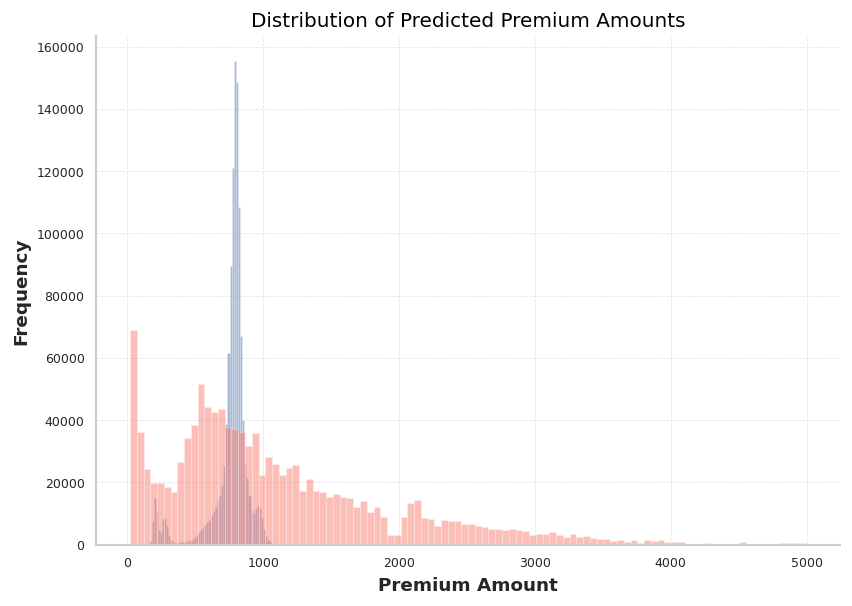

In [25]:
plt.hist(oof_results_stack["average"], bins=100, alpha=0.5)
plt.hist(train_df["Premium Amount"], bins=100, color="salmon", alpha=0.5)
plt.xlabel("Premium Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Premium Amounts")
plt.show()

In [26]:
train_df["Premium Amount"].min(),train_df["Premium Amount"].max(),train_df["Premium Amount"].mean(),train_df["Premium Amount"].median()

(20.0, 4999.0, 1102.5448216666666, 872.0)

##### Save Results:

In [27]:
df_subm_stack.head()

,Premium Amount
id,
1200000,662.735784
1200001,808.389610
1200002,798.938073
1200003,801.048221
1200004,753.847766


In [28]:
#df_subm_stack.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Submissions/submission_stack_baseline.csv')

In [29]:
#oof_results_stack["average"] = oof_results_stack.mean(axis=1)
oof_results_stack.head()

,0,1,2,3,4,average
0,NaN,1005.840082,NaN,NaN,NaN,1005.840082
1,NaN,739.732049,NaN,NaN,NaN,739.732049
2,822.09531,NaN,NaN,NaN,NaN,822.09531
3,NaN,768.72906,NaN,NaN,NaN,768.72906
4,NaN,NaN,NaN,776.067341,NaN,776.067341


In [30]:
oof_results_stack.isna().sum()

,0
0,960000
1,960000
2,960000
3,960000
4,960000
average,0


In [31]:
train_results_df_ = oof_results_stack["average"].astype("float").copy()
train_results_df_.columns = ["stack_baseline"]
#train_results_df_.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Submissions/train_stack_baseline.csv")

### **2.0 TabNet Regressor**

##### **Grouped Features**
It is possible to specify attention groups (using grouped_features). Attention is done at the group level and not feature level. This is especially useful if a dataset has a lot of columns coming from on single source of data

In [32]:
train_df.columns

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type', 'Age', 'Annual Income',
       'Health Score', 'Number of Dependents', 'Vehicle Age', 'Credit Score',
       'Insurance Duration', 'Previous Claims', 'Policy Start Date',
       'Premium Amount'],
      dtype='object')

In [33]:
grouped_features = []
feature_cols = train_df.columns.to_list()
target_col = 'Premium Amount'
feature_cols.remove(target_col)

group_person = ['Age', 'Gender', 'Marital Status', 'Education Level', 'Health Score', 'Smoking Status', 'Exercise Frequency']
group_income = ['Annual Income', 'Number of Dependents', 'Occupation', 'Credit Score', 'Property Type', 'Location']
group_policy = ['Policy Type', 'Previous Claims', 'Vehicle Age', 'Insurance Duration', 'Policy Start Date', 'Customer Feedback']

# Iterate through each set of related columns (e.g., blood glucose, insulin, etc.)
for colset in [group_person, group_income, group_policy]:
    group_idxs = [idx for idx, col in enumerate(feature_cols) if col in colset]
    grouped_features.append(group_idxs)

In [34]:
grouped_features

[[0, 1, 2, 7, 8, 10, 12], [3, 4, 9, 11, 13, 15], [5, 6, 14, 16, 17, 18]]

##### **Training & Inference**


In [35]:
train_df.head()

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Age,Annual Income,Health Score,Number of Dependents,Vehicle Age,Credit Score,Insurance Duration,Previous Claims,Policy Start Date,Premium Amount
0,0,1,0,1,2,2,2,0,3,2,19.0,10049.0,22.598761,1.0,17.0,372.0,5.0,2.0,0.951535,2869.0
1,0,0,2,0,0,1,0,1,1,2,39.0,31678.0,15.569731,3.0,12.0,694.0,2.0,1.0,1.483041,1483.0
2,1,0,1,1,1,2,1,1,3,2,23.0,25602.0,47.177549,3.0,14.0,595.0,3.0,1.0,1.181672,567.0
3,1,1,0,0,0,0,2,1,0,0,21.0,141855.0,10.938144,2.0,0.0,367.0,1.0,1.0,0.480302,765.0
4,1,2,0,1,0,2,2,1,3,2,21.0,39651.0,20.376094,1.0,8.0,598.0,4.0,0.0,3.011809,2022.0


In [36]:
X_ = train_df[feature_cols]
y = train_df[[target_col]]

In [37]:
# X.columns

# print(feature_cols)

X_.isna().sum().sum()

0

In [38]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Number of Dependents', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

In [39]:
FOLDS = 5
RANDOM_SEED = 42
X = train_df.drop(columns="Premium Amount").copy()
y = train_df["Premium Amount"].copy()

X_test = test_df.drop(columns="Premium Amount").copy()

df_subm_tabnet = df_subm.copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
rmsle = []

# Initialize the Stack
df_subm_tabnet['Premium Amount'] = 0.0

i=0

oof_results = pd.DataFrame(columns=list(range(FOLDS)), index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    scaler = MinMaxScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_valid[numerical_cols] = scaler.transform(X_valid[numerical_cols])

    X_train = X_train.to_numpy()
    X_valid = X_valid.to_numpy()

    # Initialize the TabNet Regressor model
    params = {} #'n_d': 10, 'n_a': 10, 'n_steps': 3, 'gamma': 1.37, 'lambda_sparse': 0.0016
    reg = TabNetRegressor(
        grouped_features=grouped_features,
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=0.01),
        scheduler_params={"patience":5, # how to use learning rate scheduler
                          "factor":0.5,
                          "min_lr":0.0001},
        scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
        **params)

    # Train the model using the training set and validate using the validation set
    if i>5:
      reg.fit(
          X_train, y_train,
          eval_set=[(X_valid, y_valid)],
          eval_metric=['rmsle'],
          batch_size=1024,
          max_epochs=100,
          patience=17
          )

      torch.save(reg, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/Tabnet_v6/tabnet_model_{i}.pth")

    else:
      reg = torch.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/Tabnet_v6/tabnet_model_{i}.pth")

    tab_preds = reg.predict(X_valid)

    oof_results.iloc[idx_valid,i] = tab_preds.flatten()

    # Prepare the test data and make predictions
    error = root_mean_squared_log_error(y_valid, tab_preds)
    rmsle.append(error)
    print(f"RMSLE fold {i}: {error}")

    X_test_ = X_test.copy()
    X_test_[numerical_cols] = scaler.transform(X_test_[numerical_cols])
    X_test_ = X_test_.to_numpy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    df_subm_tabnet['Premium Amount'] += reg.predict(X_test_)[:, 0] / FOLDS
    i += 1

    del scaler, reg, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()


#df_subm.to_csv('submission_tabnet.csv')

Fold 0
RMSLE fold 0: 1.1478972492470383
Fold 1
RMSLE fold 1: 1.1510460788166026
Fold 2
RMSLE fold 2: 1.1449163282070463
Fold 3
RMSLE fold 3: 1.1504960346944604
Fold 4
RMSLE fold 4: 1.152191966789925


In [40]:
rmsle

[1.1478972492470383,
 1.1510460788166026,
 1.1449163282070463,
 1.1504960346944604,
 1.152191966789925]

In [41]:
np.mean(rmsle), np.std(rmsle)

(1.1493095315510145, 0.0026087006707983746)

In [42]:
oof_results["average"] = oof_results.mean(axis=1)
oof_results["average"].min(),oof_results["average"].max()

(260.32696533203125, 2565.853759765625)

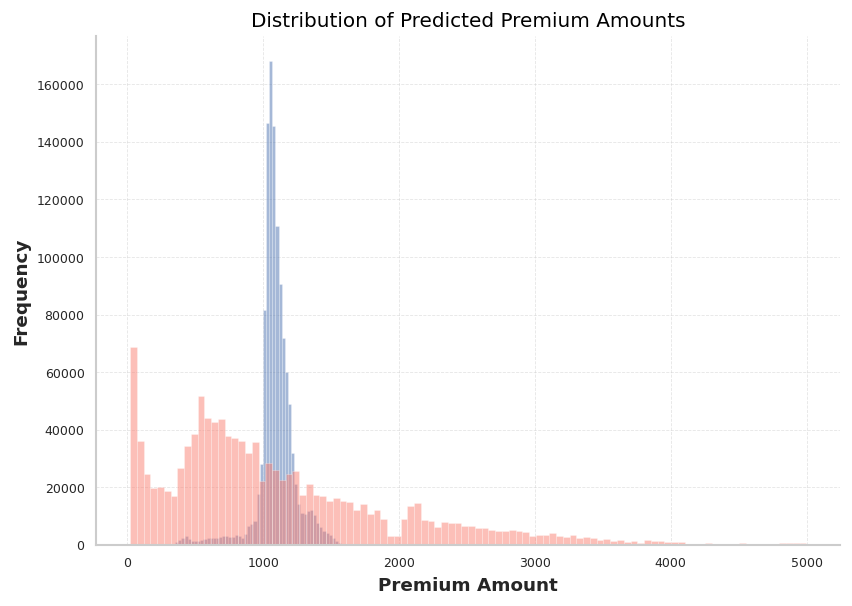

In [43]:
plt.hist(oof_results["average"], bins=100, alpha=0.5)
plt.hist(train_df["Premium Amount"], bins=100, color="salmon", alpha=0.5)
plt.xlabel("Premium Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Premium Amounts")
plt.show()

In [44]:
train_df["Premium Amount"].min(),train_df["Premium Amount"].max(),train_df["Premium Amount"].mean(),train_df["Premium Amount"].median()

(20.0, 4999.0, 1102.5448216666666, 872.0)

##### Save Results:

In [45]:
df_subm_tabnet.head()

,Premium Amount
id,
1200000,1383.073257
1200001,1101.690735
1200002,1052.458755
1200003,1074.403259
1200004,1028.962479


In [46]:
#df_subm_tabnet.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Submissions/submission_tabnet_baseline.csv')

In [47]:
#oof_results_stack["average"] = oof_results_stack.mean(axis=1)
oof_results.head()

,0,1,2,3,4,average
0,NaN,1175.173828,NaN,NaN,NaN,1175.173828
1,NaN,1012.414062,NaN,NaN,NaN,1012.414062
2,1008.60022,NaN,NaN,NaN,NaN,1008.60022
3,NaN,1109.294556,NaN,NaN,NaN,1109.294556
4,NaN,NaN,NaN,1053.674438,NaN,1053.674438


In [48]:
oof_results.isna().sum()

,0
0,960000
1,960000
2,960000
3,960000
4,960000
average,0


In [49]:
train_results_df_ = oof_results["average"].astype("float").copy()
train_results_df_.columns = ["stack_baseline"]
#train_results_df_.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Submissions/train_tabnet_baseline.csv")

### Occupation:

In [50]:
df = pd.concat([df_train, df_test], axis=0)

occ_null = df[df['Occupation'].isnull()]

occ_null.isnull().sum()/occ_null.shape[0]

,0
Age,0.015971
Gender,0.000000
Annual Income,0.036998
Marital Status,0.015380
Number of Dependents,0.090851
Education Level,0.000000
Occupation,1.000000
Health Score,0.060152
Location,0.000000
Policy Type,0.000000


In [51]:
occ_null[occ_null["Previous Claims"]>=8]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
491125,38.0,Male,18093.0,Divorced,4.0,Bachelor's,NaN,NaN,Urban,Premium,9.0,13.0,NaN,9.0,3.825507,Poor,Yes,Daily,Apartment,1614.0
1044268,63.0,Female,64514.0,Single,1.0,High School,NaN,10.176816,Suburban,Comprehensive,8.0,10.0,641.0,3.0,2.321398,Good,Yes,Monthly,Condo,3042.0
1218189,55.0,Male,52637.0,NaN,2.0,Bachelor's,NaN,31.149848,Rural,Premium,8.0,18.0,561.0,3.0,5.304959,Average,No,Rarely,Condo,NaN
1302311,48.0,Female,2392.0,Divorced,NaN,Master's,NaN,25.838981,Urban,Premium,9.0,16.0,697.0,4.0,5.033726,Good,No,Weekly,House,NaN
1556373,50.0,Male,44284.0,Single,2.0,PhD,NaN,8.787593,Suburban,Basic,9.0,6.0,552.0,8.0,0.746055,Poor,Yes,Weekly,House,NaN
1704168,20.0,Male,102339.0,Married,NaN,High School,NaN,13.727870,Urban,Premium,8.0,9.0,456.0,7.0,2.313178,Good,Yes,Monthly,Apartment,NaN


In [52]:
# fig, axs = plt.subplots(2,2,figsize=(12,10))
# axs = np.ravel(axs)

# sns.barplot(df, x="Previous Claims", y="Annual Income", hue="Occupation", ax=axs[0], palette=palette_9)
# sns.barplot(df, x="Previous Claims", y="Annual Income", ax=axs[1], palette=palette_9)

# sns.barplot(df, x="Previous Claims", y="Credit Score", hue="Occupation", ax=axs[2], palette=palette_9)
# sns.barplot(df, x="Previous Claims", y="Credit Score", ax=axs[3], palette=palette_9)

# plt.show()

In [53]:
df_train.Occupation.unique()

array(['Self-Employed', nan, 'Employed', 'Unemployed'], dtype=object)

In [54]:
grouped_means = df.groupby('Occupation').mean(numeric_only=True)
grouped_median = df.groupby('Occupation').median(numeric_only=True)
display(grouped_means)
display(grouped_median)

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Premium Amount
Occupation,,,,,,,,,,
Employed,41.126494,32799.165561,2.008159,25.589230,1.008377,9.571687,592.561871,5.015142,2.809327,1107.400895
Self-Employed,41.196764,32885.895129,2.008113,25.581261,1.003723,9.587983,592.148717,5.015989,2.815652,1106.609284
Unemployed,41.152831,32926.823404,2.007877,25.702127,1.007665,9.563437,592.114174,5.027487,2.807897,1105.369023


,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Premium Amount
Occupation,,,,,,,,,,
Employed,41.0,23959.5,2.0,24.534650,1.0,10.0,595.0,5.0,2.806329,881.0
Self-Employed,41.0,23982.0,2.0,24.578729,1.0,10.0,594.0,5.0,2.817288,874.0
Unemployed,41.0,23982.0,2.0,24.719403,1.0,10.0,594.0,5.0,2.803589,874.0


In [55]:
grouped_counts = df.groupby('Occupation')[categorical_cols].count()
grouped_counts

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
Occupation,,,,,,,,,,
Employed,471324,464221,471324,471324,471324,471324,440735,471324,471324,471324
Self-Employed,470636,463178,470636,470636,470636,470636,439951,470636,470636,470636
Unemployed,460840,453721,460840,460840,460840,460840,430901,460840,460840,460840


In [56]:
categorical_cols_no_occ = ['Gender', 'Marital Status', 'Education Level', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Number of Dependents', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

# Preprocessing for categorical features: Imputation + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('Ordinal', OneHotEncoder(sparse_output=False))
])

# Preprocessing for numerical features: Imputation + Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine both transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols_no_occ)
    ],
    remainder='drop', # Drop any columns not specified in transformers
    verbose_feature_names_out=True
)

In [57]:
le = OrdinalEncoder(encoded_missing_value=np.nan)
df["Occupation"] = le.fit_transform(df[["Occupation"]])

In [58]:
df["Occupation"].unique()

array([ 1., nan,  0.,  2.])

In [59]:
df[df.Occupation.isna()==True]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,1.483041,Average,Yes,Monthly,House,1483.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,0.480302,Poor,Yes,Daily,Apartment,765.0
5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,2.546055,Average,No,Weekly,House,3202.0
6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,Basic,2.0,8.0,807.0,6.0,4.789891,Poor,No,Weekly,House,439.0
8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,Premium,1.0,10.0,685.0,8.0,3.976192,Average,No,Monthly,Condo,213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999992,33.0,Female,788.0,Married,1.0,Bachelor's,NaN,47.921197,Urban,Premium,0.0,18.0,722.0,5.0,0.521398,Average,No,Monthly,House,NaN
1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,3.409069,Average,Yes,Daily,Condo,NaN
1999996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,1.691261,Good,No,Daily,Apartment,NaN


#### **Model HGBC**

In [60]:
X_ = df[df.Occupation.isna()==False].copy()
X_test = df[df.Occupation.isna()==True].copy()

RANDOM_SEED=42

X_test = X_test.drop(columns=["Occupation","Premium Amount"])
X = X_.drop(columns=["Occupation","Premium Amount"])
y = X_["Occupation"].copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
accuracy_fold = []

# Initialize the Stack
occ_test_pred = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

i=0

oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    # Initialize the TabNet Regressor model
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ("model",HistGradientBoostingClassifier(learning_rate=0.025,
                                                                              max_iter=500,
                                                                              max_leaf_nodes=51,
                                                                              max_depth=15,
                                                                              min_samples_leaf=20,
                                                                              l2_regularization=0.001,
                                                                              max_features=0.85,
                                                                              validation_fraction=0.15,
                                                                              max_bins=255,
                                                                              random_state=RANDOM_SEED,
                                                                              n_iter_no_change=21))])

    # Train the model using the training set and validate using the validation set
    if i >= 0:
        # Fit the StackingRegressor
        model_pipeline.fit(X_train, y_train)
        obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/hgbc_occ_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/hgbc_occ_base_{i}.skops")
        model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/hgbc_occ_base_{i}.skops", trusted=unknown_types)

    occ_preds = model_pipeline.predict(X_valid)

    oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

    # Prepare the test data and make predictions
    accuracy_ = accuracy_score(y_valid, occ_preds)
    accuracy_fold.append(accuracy_)
    print(f"Accuracy fold {i}: {accuracy_}")

    X_test_ = X_test.copy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    occ_test_pred.loc[:,i] += model_pipeline.predict(X_test_) #[:, 0] / FOLDS
    i += 1

    del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()

Fold 0
Accuracy fold 0: 0.3381879098944967
Fold 1
Accuracy fold 1: 0.3391823495865412
Fold 2
Accuracy fold 2: 0.3376710863986313
Fold 3
Accuracy fold 3: 0.340971628172227
Fold 4
Accuracy fold 4: 0.3381629597946963


    Fold 0
    Accuracy fold 0: 0.33773880809808954
    Fold 1
    Accuracy fold 1: 0.3390647276874822
    Fold 2
    Accuracy fold 2: 0.3380952380952381
    Fold 3
    Accuracy fold 3: 0.34030866837753065
    Fold 4
    Accuracy fold 4: 0.3384659252922726

#### **Model RF**

In [62]:
X_ = df[df.Occupation.isna()==False].copy()
X_test = df[df.Occupation.isna()==True].copy()

RANDOM_SEED=42

X_test = X_test.drop(columns=["Occupation","Premium Amount"])
X = X_.drop(columns=["Occupation","Premium Amount"])
y = X_["Occupation"].copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
accuracy_fold = []

# Initialize the Stack
occ_test_pred = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

i=0

oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    # Initialize the TabNet Regressor model
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ("model",RandomForestClassifier(n_estimators=250, criterion='gini', max_depth=10, min_samples_split=8, min_samples_leaf=5,
                                                                      max_features='sqrt',
                                                                      bootstrap=True, n_jobs=-1, random_state=RANDOM_SEED, max_samples=0.9))])

    # Train the model using the training set and validate using the validation set
    if i >= 5:
        # Fit the StackingRegressor
        model_pipeline.fit(X_train, y_train)
        obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/rf_occ_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/rf_occ_base_{i}.skops")
        model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/rf_occ_base_{i}.skops", trusted=unknown_types)

    occ_preds = model_pipeline.predict(X_valid)

    oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

    # Prepare the test data and make predictions
    accuracy_ = accuracy_score(y_valid, occ_preds)
    accuracy_fold.append(accuracy_)
    print(f"Accuracy fold {i}: {accuracy_}")

    X_test_ = X_test.copy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    occ_test_pred.loc[:,i] += model_pipeline.predict(X_test_) #[:, 0] / FOLDS
    i += 1

    del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()

Fold 0
Accuracy fold 0: 0.3394568006843456
Fold 1
Accuracy fold 1: 0.338857998289136
Fold 2
Accuracy fold 2: 0.3381665240946678
Fold 3
Accuracy fold 3: 0.3395280866837753
Fold 4
Accuracy fold 4: 0.3383090960935272


#### **MODEL XgbClass**

In [63]:
df[df.select_dtypes(include="object").columns] = df[df.select_dtypes(include="object").columns].astype("category")

In [64]:
X_ = df[df.Occupation.isna()==False].copy()
X_test = df[df.Occupation.isna()==True].copy()

RANDOM_SEED=42

X_test = X_test.drop(columns=["Occupation","Premium Amount"])
X = X_.drop(columns=["Occupation","Premium Amount"])
y = X_["Occupation"].copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
accuracy_fold = []

# Initialize the Stack
occ_test_pred = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

i=0

oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    # Initialize the TabNet Regressor model
    early_stop = EarlyStopping(rounds=31, metric_name="mlogloss")
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ("model",XGBClassifier(learning_rate=0.01,
                                                             objective ="multi:softmax",
                                                              n_estimators=500,
                                                              max_depth=10,
                                                              min_child_weight=1,
                                                              subsample=0.85,
                                                              eval_metric='mlogloss',
                                                              colsample_bytree=0.9,
                                                              callbacks=[early_stop],
                                                              enable_categorical="True",
                                                              reg_lambda=0.001,
                                                              reg_alpha=0.001))])

    # Train the model using the training set and validate using the validation set
    if i >= 5:
        # Fit the StackingRegressor
        model_pipeline[:-1].fit(X_train, y_train)
        X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
        eval_set = [(X_val_, y_valid)]


        model_pipeline.fit(X_train, y_train, model__eval_set=eval_set)
        obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/xgb_occ_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/xgb_occ_base_{i}.skops")
        model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/xgb_occ_base_{i}.skops", trusted=unknown_types)

    occ_preds = model_pipeline.predict(X_valid)

    oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

    # Prepare the test data and make predictions
    accuracy_ = accuracy_score(y_valid, occ_preds)
    accuracy_fold.append(accuracy_)
    print(f"Accuracy fold {i}: {accuracy_}")

    X_test_ = X_test.copy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    occ_test_pred.loc[:,i] = model_pipeline.predict(X_test_) #[:, 0] / FOLDS
    i += 1

    #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()

Fold 0
Accuracy fold 0: 0.3381879098944967
Fold 1
Accuracy fold 1: 0.3391823495865412
Fold 2
Accuracy fold 2: 0.3376710863986313
Fold 3
Accuracy fold 3: 0.340971628172227
Fold 4
Accuracy fold 4: 0.3381629597946963


In [65]:
model_pipeline.predict(X_test_)
#oof_results

array([0., 2., 1., ..., 1., 0., 0.])

In [66]:
oof_results.iloc[idx_valid,:]
oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

In [67]:
#occ_test_pred.loc[:,i] = model_pipeline.predict(X_test_)
occ_test_pred.tail(10)
#oof_results.head()

,0,1,2,3,4
id,,,,,
1999975,1.0,1.0,1.0,0.0,0.0
1999983,1.0,1.0,1.0,2.0,1.0
1999986,0.0,0.0,0.0,0.0,0.0
1999990,0.0,0.0,1.0,0.0,0.0
1999991,1.0,0.0,1.0,1.0,0.0
1999992,2.0,0.0,1.0,0.0,0.0
1999995,0.0,0.0,0.0,1.0,1.0
1999996,1.0,2.0,1.0,2.0,1.0
1999998,0.0,0.0,0.0,1.0,0.0


#### **Model Staked**

In [ ]:
X_ = df[df.Occupation.isna()==False].copy()
X_test = df[df.Occupation.isna()==True].copy()

RANDOM_SEED=42

X_test = X_test.drop(columns=["Occupation","Premium Amount"])
X = X_.drop(columns=["Occupation","Premium Amount"])
y = X_["Occupation"].copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
accuracy_fold = []

# Initialize the Stack
occ_test_pred = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

i=0

oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    # Initialize the TabNet Regressor model
    early_stop = EarlyStopping(rounds=31, metric_name="mlogloss")

    estimators = [
        ('lgbm', LGBMRegressor(objective="multiclass",num_class=3, metric="multi_error", max_depth=10,reg_alpha=0.001,reg_lambda=0.001,
                               random_state=RANDOM_SEED, n_estimators=350,subsample=0.9, colsample_bytree=0.95, learning_rate=0.01)),
        ('xgb', XGBClassifier(learning_rate=0.01,objective ="multi:softmax",n_estimators=350,max_depth=10,min_child_weight=1,subsample=0.85,eval_metric='mlogloss',
                              colsample_bytree=0.9,enable_categorical="True",reg_lambda=0.001,reg_alpha=0.001)),
        ('catboost', CatBoostClassifier(iterations=500, learning_rate=0.01, depth=8, l2_leaf_reg=3, loss_function='MultiClass', eval_metric='Accuracy',
                           random_seed=RANDOM_SEED, subsample=0.85, bootstrap_type='Bernoulli'))
            ]

    meta_model = LogisticRegression(C=1.0,  solver="saga", random_state=RANDOM_SEED, max_iter=250)

    # Create StackingRegressor
    stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ("model",stacking_model)])



    # Train the model using the training set and validate using the validation set
    if i >= 3:
        # Fit the StackingRegressor
        # model_pipeline[:-1].fit(X_train, y_train)
        # X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
        # eval_set = [(X_val_, y_valid)]


        model_pipeline.fit(X_train, y_train)
        obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_occ_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_occ_base_{i}.skops")
        model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_occ_base_{i}.skops", trusted=unknown_types)

    occ_preds = model_pipeline.predict(X_valid)

    oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

    # Prepare the test data and make predictions
    accuracy_ = accuracy_score(y_valid, occ_preds)
    accuracy_fold.append(accuracy_)
    print(f"Accuracy fold {i}: {accuracy_}")

    X_test_ = X_test.copy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    occ_test_pred.loc[:,i] = model_pipeline.predict(X_test_) #[:, 0] / FOLDS
    i += 1

    #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()

Streaming output truncated to the last 5000 lines.
100:	learn: 0.3633236	total: 26.1s	remaining: 1m 43s
101:	learn: 0.3634795	total: 26.4s	remaining: 1m 42s
102:	learn: 0.3634717	total: 26.6s	remaining: 1m 42s
103:	learn: 0.3635107	total: 26.9s	remaining: 1m 42s
104:	learn: 0.3635062	total: 27.1s	remaining: 1m 41s
105:	learn: 0.3636956	total: 27.3s	remaining: 1m 41s
106:	learn: 0.3636622	total: 27.6s	remaining: 1m 41s
107:	learn: 0.3638404	total: 27.8s	remaining: 1m 41s
108:	learn: 0.3638293	total: 28.1s	remaining: 1m 40s
109:	learn: 0.3639306	total: 28.3s	remaining: 1m 40s
110:	learn: 0.3642570	total: 28.6s	remaining: 1m 40s
111:	learn: 0.3641991	total: 28.8s	remaining: 1m 39s
112:	learn: 0.3642147	total: 29s	remaining: 1m 39s
113:	learn: 0.3640331	total: 29.3s	remaining: 1m 39s
114:	learn: 0.3642002	total: 29.5s	remaining: 1m 38s
115:	learn: 0.3643227	total: 29.7s	remaining: 1m 38s
116:	learn: 0.3643583	total: 30s	remaining: 1m 38s
117:	learn: 0.3646491	total: 30.2s	remaining: 1m 37s

In [ ]:
df.Occupation

,Occupation
id,
0,1.0
1,NaN
2,1.0
3,NaN
4,1.0
...,...
1999995,NaN
1999996,NaN
1999997,0.0


In [ ]:
# Fit and transform the training data
X_preprocessed = preprocessor.fit_transform(df)

df_preprocessed = pd.DataFrame(X_preprocessed, columns=numerical_cols+categorical_cols_no_occ)
df_preprocessed["Target"] = df["Occupation"]
#df_preprocessed["Premium Amount"] = df["Premium Amount"]

In [ ]:
#df_preprocessed.isna().sum()
df_preprocessed_train = df_preprocessed[df_preprocessed.Target.isna()==False]
df_preprocessed_test = df_preprocessed[df_preprocessed.Target.isna()==True]

df_preprocessed_train.shape, df_preprocessed_test.shape

((1402800, 19), (597200, 19))

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=False)

# Retrieve the correlations with `Occupation`
occupation_corr = corr_matrix['Previous Claims']

# Print the correlations
print(occupation_corr.to_markdown(numalign="left", stralign="left"))

ValueError: could not convert string to float: 'Female'